# TA GYIMAH TRIALS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

In [2]:
## MINI PROJECT####
(1) Using the data above, perform a validation study comparing gauge and satellite data on:
	(a) Monthly scale
	(b) Annual Scale
	(c) Seasonal Scale
	(c) Inteprete your results in each scale
	(d) From the results give the implications of your results for each scale


SyntaxError: invalid syntax (3231478061.py, line 2)

In [2]:
data = pd.read_excel('mon_all.xlsx')#,delimiter=',',skiprows=1)
data

,YEAR,MONTH,GAUGE,SATELLITE_DATA
0,1998,1,20.903946,15.365666
1,1998,2,27.162743,13.427083
2,1998,3,28.503807,33.875000
3,1998,4,94.114746,117.046307
4,1998,5,121.339172,160.082156
...,...,...,...,...
175,2012,8,77.245155,108.197917
176,2012,9,168.770508,180.020833
177,2012,10,142.981079,161.781250
178,2012,11,42.880787,53.729167


In [3]:
new_data={
    'month': data.MONTH,
    'gauge': data.GAUGE,
    'satellite': data.SATELLITE_DATA}



dataset=pd.DataFrame(new_data)
dataset

,month,gauge,satellite
0,1,20.903946,15.365666
1,2,27.162743,13.427083
2,3,28.503807,33.875000
3,4,94.114746,117.046307
4,5,121.339172,160.082156
...,...,...,...
175,8,77.245155,108.197917
176,9,168.770508,180.020833
177,10,142.981079,161.781250
178,11,42.880787,53.729167


In [4]:
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
year=['1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012']

In [4]:
monthy_data = data.groupby('MONTH').mean()
monthy_data 

,YEAR,GAUGE,SATELLITE_DATA
MONTH,,,
1,2005.0,17.804244,11.791308
2,2005.0,30.441153,28.586107
3,2005.0,57.194506,70.922264
4,2005.0,106.358267,106.468720
5,2005.0,126.767170,147.941398
6,2005.0,163.182536,187.460831
7,2005.0,132.493334,158.623493
8,2005.0,126.218821,156.352511
9,2005.0,161.963864,189.147321


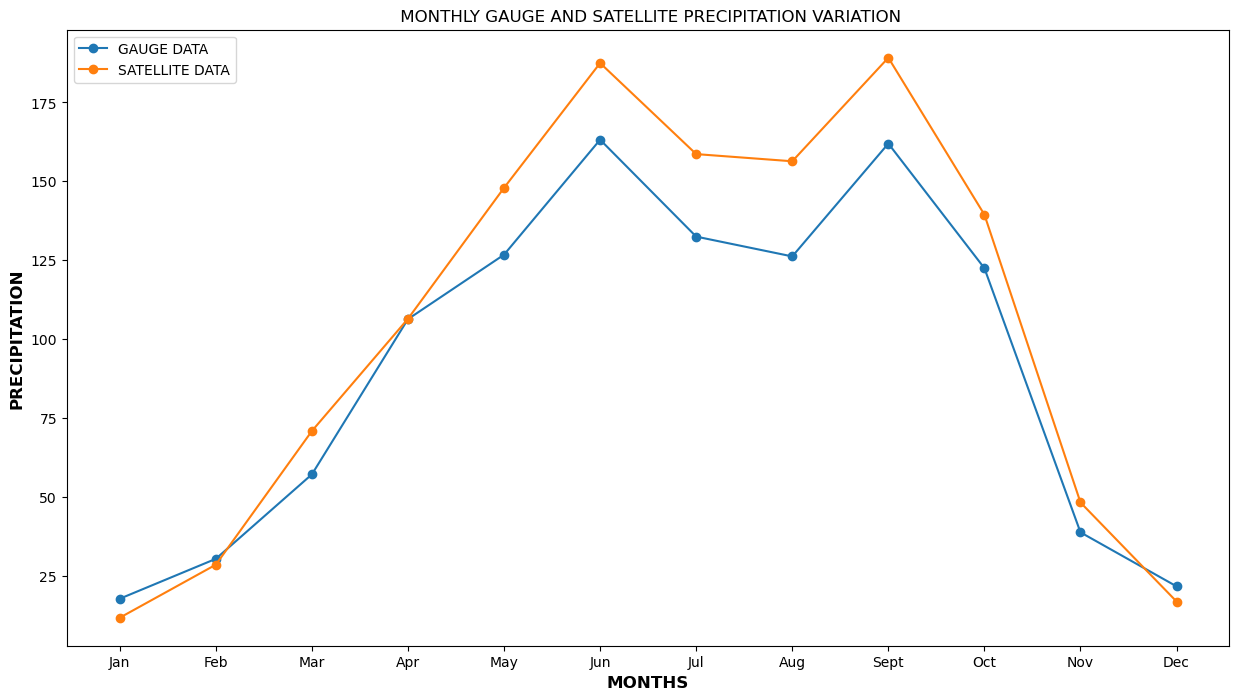

In [9]:
# plt.plot(month,monthy_data.SATELLITE_DATA)
plt.figure(figsize=(15, 8))
plt.plot(month,monthy_data.GAUGE,label='GAUGE DATA',marker='o')
plt.plot(month,monthy_data.SATELLITE_DATA, label='SATELLITE DATA',marker='o')
plt.xlabel('MONTHS', fontsize=12,fontweight='bold')
plt.ylabel('PRECIPITATION', fontsize=12,fontweight='bold')

plt.title(' MONTHLY GAUGE AND SATELLITE PRECIPITATION VARIATION') 
plt.legend(loc='upper left')
plt.savefig('gauge-sat-pre.png', bbox_inches='tight', dpi=500)

In [5]:
yearly_data = data.groupby('YEAR').mean()
yearly_data 

,MONTH,GAUGE,SATELLITE_DATA
YEAR,,,
1998,6.5,82.319653,97.180329
1999,6.5,103.864275,124.010115
2000,6.5,91.058358,101.301215
2001,6.5,82.534716,87.220486
2002,6.5,97.269077,105.664062
2003,6.5,94.626112,107.238715
2004,6.5,94.879050,99.740451
2005,6.5,91.036123,110.996450
2006,6.5,89.029077,107.510085


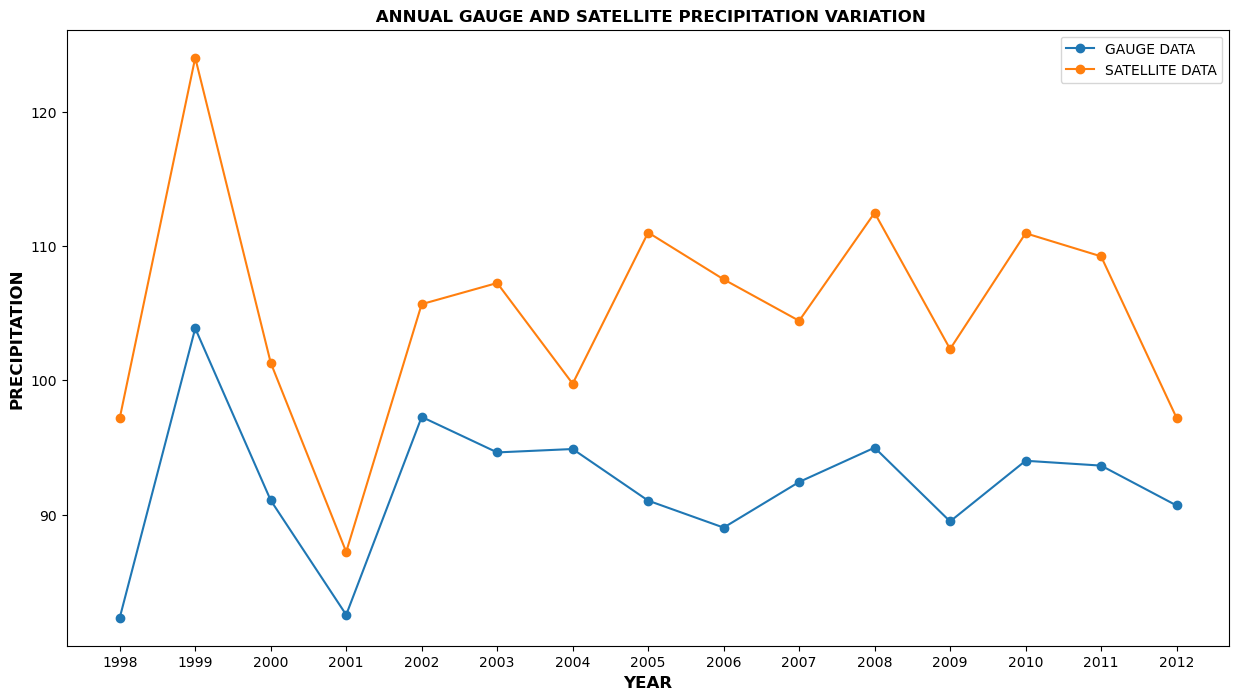

In [11]:
# plt.plot(yearly_data.iloc[:, 0] ,yearly_data.GAUGE,label='GAUGE DATA',marker='o')
# plt.plot(yearly_data.iloc[:, 0] ,yearly_data.SATELLITE_DATA, label='SATELLITE DATA',marker='o')
plt.figure(figsize=(15, 8))
plt.plot(year ,yearly_data.GAUGE,label='GAUGE DATA',marker='o')
plt.plot(year ,yearly_data.SATELLITE_DATA, label='SATELLITE DATA',marker='o')
plt.xlabel('YEAR', fontsize=12,fontweight='bold')
plt.ylabel('PRECIPITATION', fontsize=12, fontweight='bold')

plt.title(' ANNUAL GAUGE AND SATELLITE PRECIPITATION VARIATION',fontsize=12,fontweight='bold')        

plt.legend();
plt.savefig('annual-gauge-sat-pre.png', bbox_inches='tight', dpi=500)

In [8]:
# Seasonal averages (assuming 3-month seasons)
data['Season'] = (data['MONTH'] - 1) // 3
data['Season'] 
# data['Season']
# seasonal_avg = data.groupby(['Season']).mean('Season').reset_index()


0      0
1      0
2      0
3      1
4      1
      ..
175    2
176    2
177    3
178    3
179    3
Name: Season, Length: 180, dtype: int64

In [10]:
data['Season'] = (data['MONTH'] - 1) // 3
data['Season']
# seasonal_avg= data.groupby('Season').mean('Season')

0      0
1      0
2      0
3      1
4      1
      ..
175    2
176    2
177    3
178    3
179    3
Name: Season, Length: 180, dtype: int64

In [13]:
season_names=['DJF','MAM','JJA','SON']

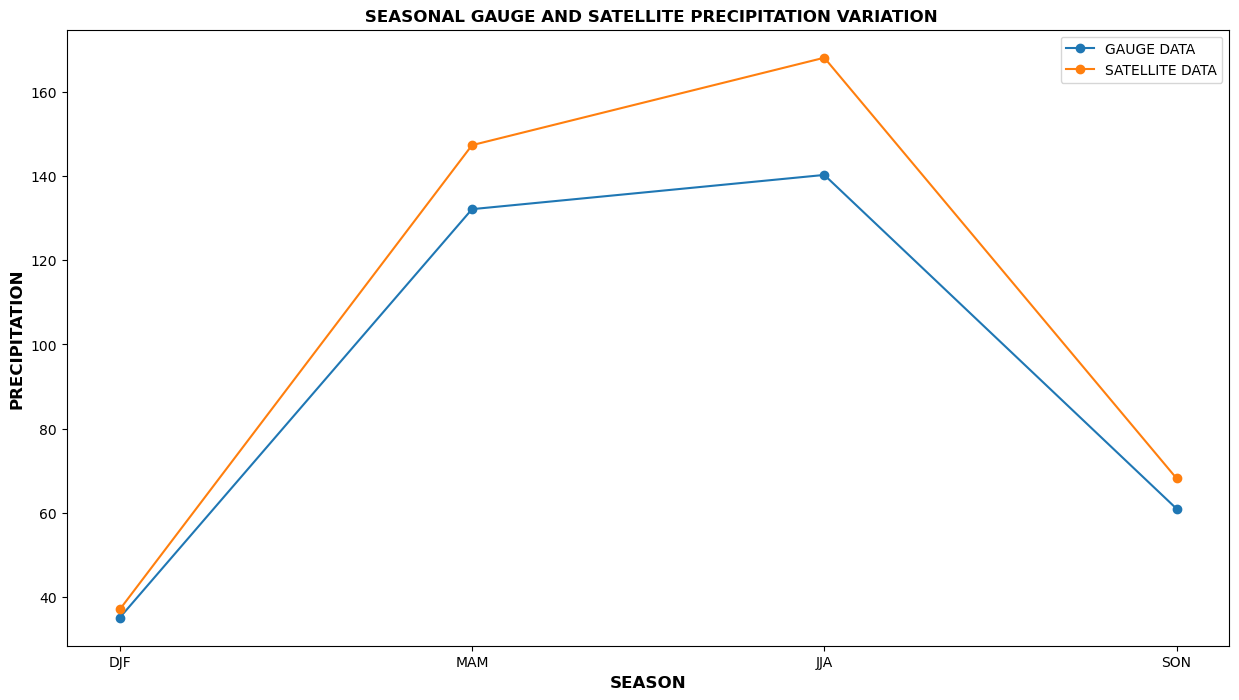

In [14]:
plt.figure(figsize=(15, 8))
plt.plot( season_names,seasonal_avg.GAUGE,label='GAUGE DATA',marker='o')
plt.plot(season_names,seasonal_avg.SATELLITE_DATA, label='SATELLITE DATA',marker='o')
plt.xlabel('SEASON', fontsize=12,fontweight='bold')
plt.ylabel('PRECIPITATION', fontsize=12, fontweight='bold')

plt.title(' SEASONAL GAUGE AND SATELLITE PRECIPITATION VARIATION',fontsize=12,fontweight='bold')        

plt.legend();
plt.savefig('season-gauge-sat-pre.png', bbox_inches='tight', dpi=500)

In [3]:
from matplotlib.animation import FuncAnimation
from IPython import display

In [4]:
output = plt.plot([])
plt.close()
print(output[0])

Line2D(_child0)


In [6]:
x= np.linspace(0, 2*np.pi, 100)


fig= plt.figure()

lines= plt.plot([])
line= lines[0]

plt.xlim(0, 2*np.pi)
plt.ylim(-1.1,1.1)

def animate(frame):
    y= np.sin(x + 2*np.pi * frame/100)
    line.set_data((x,y))
    
anim= FuncAnimation(fig, animate, frames= 100, interval= 20)
video= anim.to_html5_video()
html= display.HTML(video)
display.display(html)
plt.close()


In [51]:
# Monthly averages
monthly_avg = data.groupby([ 'MONTH']).mean().reset_index()

# Annual averages
annual_avg = data.groupby('YEAR').mean().reset_index()

# Seasonal averages (assuming 3-month seasons)
data['Season'] = (data['MONTH'] - 1) // 3
seasonal_avg = data.groupby([ 'Season']).mean().reset_index()

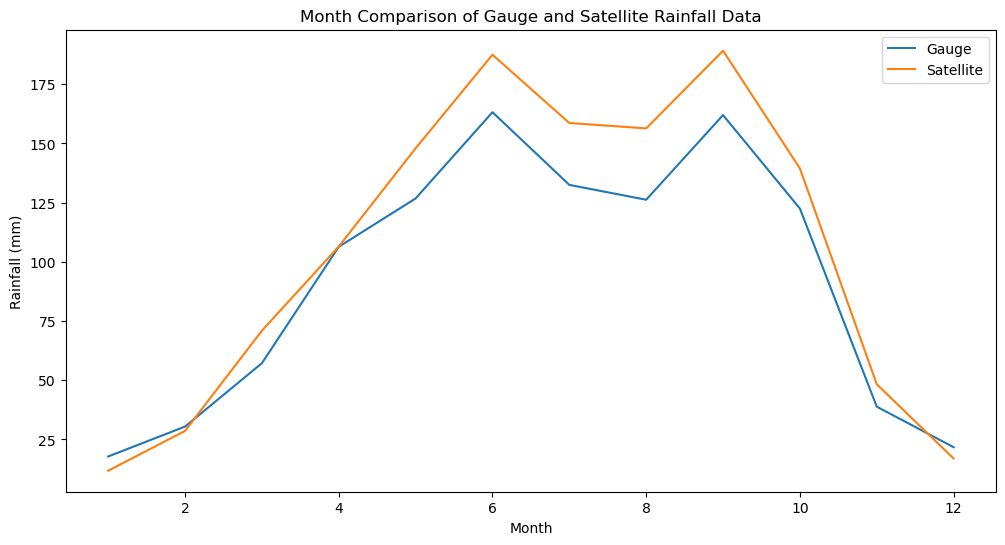

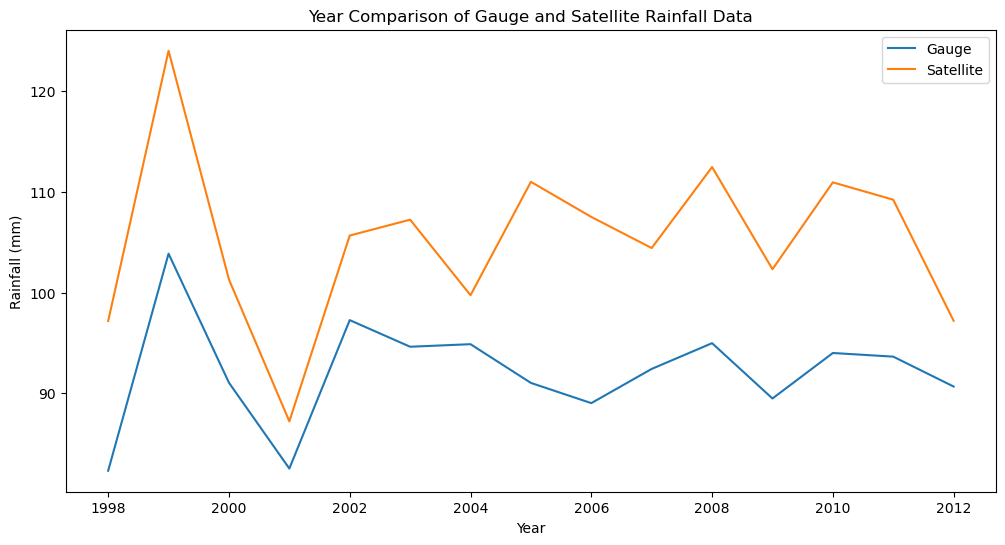

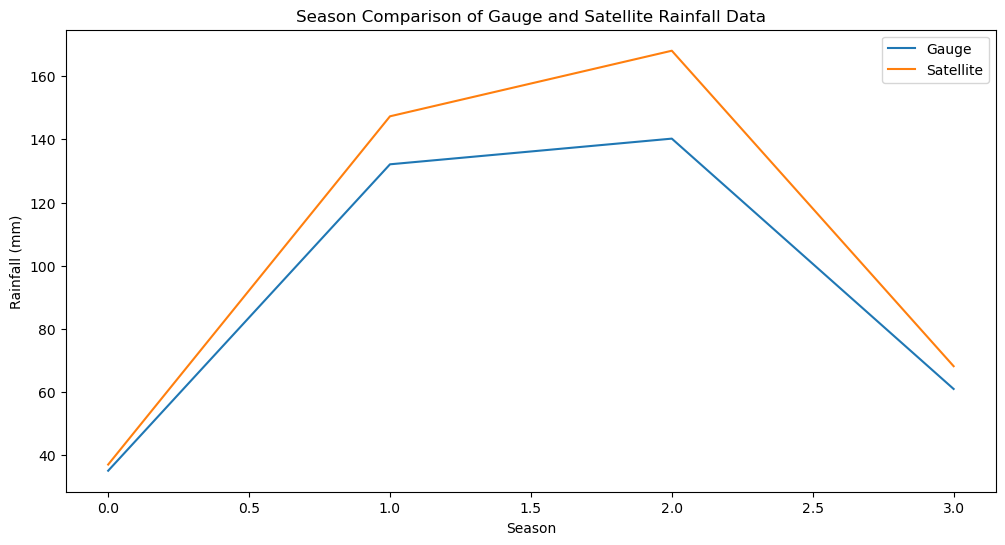

In [52]:
def compare_datasets(df, scale):
    plt.figure(figsize=(12, 6))
    plt.plot(df[scale], df['GAUGE'], label='Gauge')
    plt.plot(df[scale], df['SATELLITE_DATA'], label='Satellite')
    plt.xlabel(scale.capitalize())
    plt.ylabel('Rainfall (mm)')
    plt.legend()
    plt.title(f'{scale.capitalize()} Comparison of Gauge and Satellite Rainfall Data')
    plt.show()

compare_datasets(monthly_avg, 'MONTH')
compare_datasets(annual_avg, 'YEAR')
compare_datasets(seasonal_avg, 'Season')

In [33]:
data = pd.read_excel('mon_all.xlsx')#,delimiter=',',skiprows=1)
mon=data[:,0]
gg = data[:,2]
cru = data[:,3]
fews = data[:,4]
gpcc = data[:,5]
tam= data[:,6]
tr=data[:,7]
cmap = data[:,8]
gpcp = data[:,9]
chirp = data[:,10]

########## PLOTTING OF FIGURE ###############




InvalidIndexError: (slice(None, None, None), 0)

In [21]:
#plt.subplot(2,1,1)
fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(2,2,1)
plt.plot(gg,color='r')
plt.plot(cru,color='b')
plt.xticks(fontsize='12')
plt.ylabel('Satellite (mm)',fontsize='12')
plt.yticks(fontsize='12')
'''
ax1 = fig.add_subplot(2,2,2)
plt.plot(gg,color='r')
plt.plot(fews,color='brown')
plt.xticks(fontsize='12')
plt.ylabel('Satellite (mm)',fontsize='12')
plt.yticks(fontsize='12')

In [22]:
'''
#plt.xlim(0,13)
#plt.xticks(mon,["J","F","M","A","M","J","J","A","S","O","N","D"])
'''
ax1 = fig.add_subplot(2,2,2)
plt.plot(cru,color='b')
#plt.xlim([0,205])+
#plt.ylim([0,205])
#plt.legend(loc=2)
#plt.xlabel('Gauge (mm)',fontsize='13')
plt.xticks(fontsize='13')
plt.ylabel('Satellite (mm)',fontsize='13')
plt.yticks(fontsize='13')

plt.show()


(         YEAR       GAUGE  SATELLITE_DATA
 MONTH                                    
 1      2005.0   17.804244       11.791308
 2      2005.0   30.441153       28.586107
 3      2005.0   57.194506       70.922264
 4      2005.0  106.358267      106.468720
 5      2005.0  126.767170      147.941398
 6      2005.0  163.182536      187.460831
 7      2005.0  132.493334      158.623493
 8      2005.0  126.218821      156.352511
 9      2005.0  161.963864      189.147321
 10     2005.0  122.488986      139.440476
 11     2005.0   38.831424       48.290278
 12     2005.0   21.724148       16.926520,
 'Dec',
 'Jan',
 'Feb')